In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob
from scipy.optimize import curve_fit 
import scipy

# Reading in Data

In [90]:
data_folder1 = '/Users/mmdallas/Desktop/lsa-ast361/Work/mmdallas/lab7/lab7_radio_astronomy/sun_azimuth/'

az_files = glob.glob(data_folder1 + "sun*") 
az_files.sort()

data_folder2 = '/Users/mmdallas/Desktop/lsa-ast361/Work/mmdallas/lab7/lab7_radio_astronomy/sun_elevation/'

el_files = glob.glob(data_folder2 + "sun*") 
el_files.sort()

/Users/mmdallas/Desktop/lsa-ast361/Work/mmdallas/lab7/lab7_radio_astronomy/sun_elevation/sun_el_m1
/Users/mmdallas/Desktop/lsa-ast361/Work/mmdallas/lab7/lab7_radio_astronomy/sun_elevation/sun_el_m2
/Users/mmdallas/Desktop/lsa-ast361/Work/mmdallas/lab7/lab7_radio_astronomy/sun_elevation/sun_el_m3
/Users/mmdallas/Desktop/lsa-ast361/Work/mmdallas/lab7/lab7_radio_astronomy/sun_elevation/sun_el_m4
/Users/mmdallas/Desktop/lsa-ast361/Work/mmdallas/lab7/lab7_radio_astronomy/sun_elevation/sun_el_m5
/Users/mmdallas/Desktop/lsa-ast361/Work/mmdallas/lab7/lab7_radio_astronomy/sun_elevation/sun_el_p1
/Users/mmdallas/Desktop/lsa-ast361/Work/mmdallas/lab7/lab7_radio_astronomy/sun_elevation/sun_el_p10
/Users/mmdallas/Desktop/lsa-ast361/Work/mmdallas/lab7/lab7_radio_astronomy/sun_elevation/sun_el_p2
/Users/mmdallas/Desktop/lsa-ast361/Work/mmdallas/lab7/lab7_radio_astronomy/sun_elevation/sun_el_p3
/Users/mmdallas/Desktop/lsa-ast361/Work/mmdallas/lab7/lab7_radio_astronomy/sun_elevation/sun_el_p4
/Users/mm

# Creating Spectra for Azimuth and Elevation

In [84]:
az_spectra = [] #Create Az Spectrum Array 

for az_file in az_files: 
    
    with open(az_file) as az_data: 
        
        spectrum_rows1 = []    
        
        for j, row in enumerate(az_data, start=1): 
            if j%4 == 0: 
                spectrum_rows1.append(row) 
                
        tot_spectrum1 = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows1: 
            temp_spec1 = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec1 = [] # Create an empty list to hold the spectral data
            for val1 in temp_spec1: # Iterate over the elements of your split list.
                if val1 != '' and val1 != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec1.append(val1) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum1 = tot_spectrum1 + np.float64(spec1) # Add the data from the current row to your total spectral data for this file.
            
        az_spectra.append(tot_spectrum1)
        

el_spectra = [] #Create El Spectrum Array 

for el_file in el_files: 
    
    with open(el_file) as el_data: 
        
        spectrum_rows2 = []    
        
        for j, row in enumerate(el_data, start=1): 
            if j%4 == 0: 
                spectrum_rows2.append(row) 
                
        tot_spectrum2 = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows2: 
            temp_spec2 = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec2 = [] # Create an empty list to hold the spectral data
            for val2 in temp_spec2: # Iterate over the elements of your split list.
                if val2 != '' and val2 != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec2.append(val2) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum2 = tot_spectrum2 + np.float64(spec2) # Add the data from the current row to your total spectral data for this file.
            
        el_spectra.append(tot_spectrum2)
        

# Plotting Each Azimuth and Elivation Flux vs Frequency

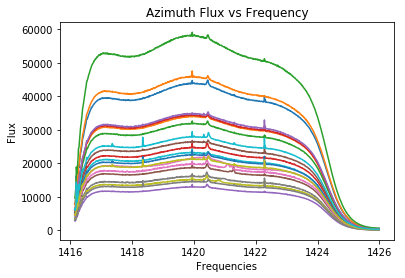

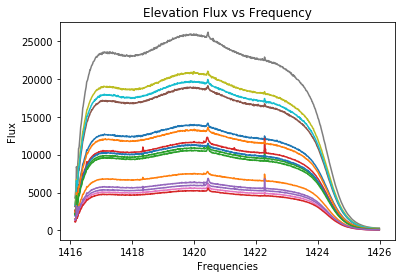

In [96]:
#Make an array with 1416 to 1426 with steps of 0.009766 
frequency_range = np.arange(1416,1426,0.009766)

#Plot Flux vs Frequency for Azimuth 2nd Data

for i in range(len(az_spectra)):
    az_spectra_range = az_spectra[i][15:]
    plt.plot(frequency_range[15:],az_spectra_range)
plt.title('Azimuth Flux vs Frequency')
plt.xlabel('Frequencies')
plt.ylabel('Flux')
plt.show()

#Plot Flux vs Frequency for Elivation
for a in range(len(el_spectra)):
    el_spectra_range = el_spectra[a][15:]
    plt.plot(frequency_range[15:],el_spectra_range)
plt.title('Elevation Flux vs Frequency')
plt.xlabel('Frequencies')
plt.ylabel('Flux')
plt.show()

# Plotting Integrated Flux Vs Azimuth/ Elevation Position

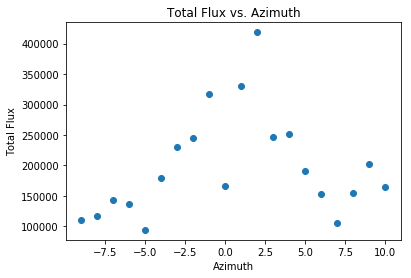

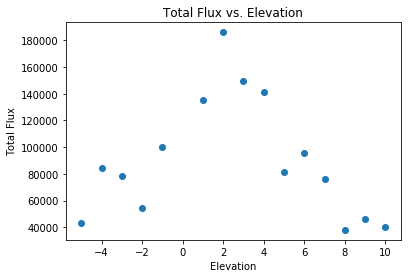

In [95]:
#Integrating Each Flux from 15th element to 1024th element

order1 = [-1,-2,-3,-4,-5,-6,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9]

sum_flux_azimuth = np.trapz(az_spectra, frequency)
plt.scatter(order1, sum_flux_azimuth)
plt.title('Total Flux vs. Azimuth')
plt.xlabel('Azimuth')
plt.ylabel('Total Flux')
plt.show()

order2 = [-1,-2,-3,-4,-5,1,10,2,3,4,5,6,7,8,9]

sum_flux_el = np.trapz(el_spectra, frequency)
plt.scatter(order2, sum_flux_el)
plt.title('Total Flux vs. Elevation')
plt.xlabel('Elevation')
plt.ylabel('Total Flux')
plt.show()
    

# Azimuth Curve Fit and Full Width Half Max

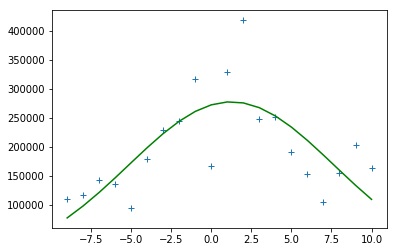

Full Width Half Max of Total Flux vs Azimuth= 15.113601102349058


In [148]:
#Variables a= standard deviation, b= mean, and c= amplitude 
pi = (2*np.pi)**0.5
def func1 (x,a,b,c):
    return (c/(a*pi))*np.exp((-0.5)*((x-b)/a)**2)

# Initial Estimates for Azimuth
a0,b0,c0 = (4,0,35000)
xvals1 = np.array(order1)
yvals1 = sum_flux_azimuth


coeffs, fiterr = curve_fit(func1, xvals1, yvals1, p0=(a0,b0,c0))
            
plt.plot(xvals1,yvals1, '+')
plt.plot(np.sort(xvals1),func(np.sort(xvals1),coeffs[0], coeffs[1], coeffs[2]), 'g')
plt.show()

fwhm1=2.355*coeffs[0]

print('Full Width Half Max of Total Flux vs Azimuth=',fwhm1)

# Elevation Curve Fit and Full Width Half Max

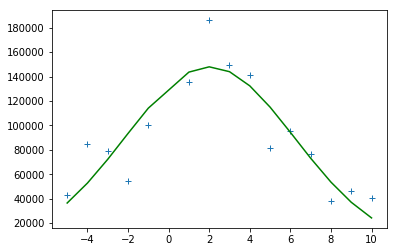

Full Width Half Max of Total Flux vs Elevation= 9.871817203755894


In [150]:
#Variables a= standard deviation, b= mean, and c= amplitude 

def func2 (z,d,e,f):
    return (f/(d*pi))*np.exp((-0.5)*((z-e)/d)**2)

# Initial Estimates for Azimuth
d0,e0,f0 = (4,0,160000)
xvals2 = np.array(order2)
yvals2 = sum_flux_el


coeffs, fiterr = curve_fit(func2, xvals2, yvals2, p0=(d0,e0,f0))

plt.plot(xvals2,yvals2, '+')
plt.plot(np.sort(xvals2),func(np.sort(xvals2),coeffs[0], coeffs[1], coeffs[2]), 'g')
plt.show()

fwhm2=2.355*coeffs[0]

print('Full Width Half Max of Total Flux vs Elevation=',fwhm2)